# Risk Sensitivity Analysis

Deze notebook is voor het uitvoeren van een SA op risk weging.

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
from SALib.analyze import sobol
from SALib.sample import saltelli 

from model_find_paths import connect_distribution_to_postnl

# Algemene risks

In [3]:
df = pd.read_csv("/Users/cmartens/Documents/thesis_cf_martens/2.risk_analysis/input/risk_scores.csv") 
# drop last 3 rows 
df = df.drop(df.index[-3:])


In [4]:
df

,area_type,Sf,Sp,Ss,L1,L2,L3,L4,L5,Height
0,Motorways and major roads,4.0,3.0,1.0,3.0,2.0,1.0,1.0,3.0,30.0
1,Regional roads,3.0,3.0,2.0,4.0,3.0,1.0,3.0,2.0,30.0
2,Tracks and rural access roads,2.0,2.0,1.0,2.0,1.0,3.0,2.0,2.0,30.0
3,Living and residential streets,3.0,4.0,4.0,5.0,4.0,1.0,5.0,3.0,30.0
4,Pedestrian and cycling paths,3.0,2.0,3.0,4.0,2.0,2.0,2.0,2.0,30.0
5,Railways,4.0,3.0,2.0,5.0,2.0,2.0,1.0,4.0,30.0
6,Power lines,1.0,4.0,1.0,2.0,2.0,3.0,1.0,5.0,60.0
7,Power plants,1.0,4.0,2.0,4.0,3.0,2.0,3.0,5.0,60.0
8,Communication towers,1.0,3.0,1.0,4.0,5.0,1.0,2.0,4.0,60.0
9,High infrastructures,1.0,3.0,2.0,4.0,2.0,1.0,3.0,3.0,60.0


In [5]:
# Aantal externe risicofactoren
n_factors = 5

# Bereken cumulatieve bijdrage per domein (zonder deling)
R_f_total = 0
R_p_total = 0

# Loop over externe risicofactoren
for i in range(1, n_factors + 1):
    # Bereken afzonderlijke fatality- en property-risicobijdragen
    df[f"R_if_{i}"] = df["Sf"] * df[f"L{i}"]
    df[f"R_ip_{i}"] = df["Sp"] * df[f"L{i}"]
    
    # Tel cumulatief op
    R_f_total += df[f"R_if_{i}"]
    R_p_total += df[f"R_ip_{i}"]

# Cumulatieve crash-gerelateerde risico's
df["R_f"] = R_f_total
df["R_p"] = R_p_total

# Sociaal risico (losstaand van risicofactoren)
df["R_s"] = df["Ss"]

# Normaliseer fatality, property en societal domeinen afzonderlijk
df["R_f_norm"] = (df["R_f"] - df["R_f"].min()) / (df["R_f"].max() - df["R_f"].min())
df["R_p_norm"] = (df["R_p"] - df["R_p"].min()) / (df["R_p"].max() - df["R_p"].min())
df["R_s_norm"] = (df["R_s"] - df["R_s"].min()) / (df["R_s"].max() - df["R_s"].min())

In [6]:
df

,area_type,Sf,Sp,Ss,L1,L2,L3,L4,L5,Height,...,R_if_4,R_ip_4,R_if_5,R_ip_5,R_f,R_p,R_s,R_f_norm,R_p_norm,R_s_norm
0,Motorways and major roads,4.0,3.0,1.0,3.0,2.0,1.0,1.0,3.0,30.0,...,4.0,3.0,12.0,9.0,40.0,30.0,1.0,0.548387,0.307692,0.000000
1,Regional roads,3.0,3.0,2.0,4.0,3.0,1.0,3.0,2.0,30.0,...,9.0,9.0,6.0,6.0,39.0,39.0,2.0,0.532258,0.423077,0.333333
2,Tracks and rural access roads,2.0,2.0,1.0,2.0,1.0,3.0,2.0,2.0,30.0,...,4.0,4.0,4.0,4.0,20.0,20.0,1.0,0.225806,0.179487,0.000000
3,Living and residential streets,3.0,4.0,4.0,5.0,4.0,1.0,5.0,3.0,30.0,...,15.0,20.0,9.0,12.0,54.0,72.0,4.0,0.774194,0.846154,1.000000
4,Pedestrian and cycling paths,3.0,2.0,3.0,4.0,2.0,2.0,2.0,2.0,30.0,...,6.0,4.0,6.0,4.0,36.0,24.0,3.0,0.483871,0.230769,0.666667
5,Railways,4.0,3.0,2.0,5.0,2.0,2.0,1.0,4.0,30.0,...,4.0,3.0,16.0,12.0,56.0,42.0,2.0,0.806452,0.461538,0.333333
6,Power lines,1.0,4.0,1.0,2.0,2.0,3.0,1.0,5.0,60.0,...,1.0,4.0,5.0,20.0,13.0,52.0,1.0,0.112903,0.589744,0.000000
7,Power plants,1.0,4.0,2.0,4.0,3.0,2.0,3.0,5.0,60.0,...,3.0,12.0,5.0,20.0,17.0,68.0,2.0,0.177419,0.794872,0.333333
8,Communication towers,1.0,3.0,1.0,4.0,5.0,1.0,2.0,4.0,60.0,...,2.0,6.0,4.0,12.0,16.0,48.0,1.0,0.161290,0.538462,0.000000
9,High infrastructures,1.0,3.0,2.0,4.0,2.0,1.0,3.0,3.0,60.0,...,3.0,9.0,3.0,9.0,13.0,39.0,2.0,0.112903,0.423077,0.333333


# SA op Fatality, Property, Societal Impact

In [9]:
sensitivity_weights = [
    ("Base",                          (0.4, 0.3, 0.3)),
    ("Increased fatality weight",     (0.5, 0.25, 0.25)),
    ("Decreased fatality weight",     (0.3, 0.35, 0.35)),
    ("Increased property weight",     (0.3, 0.4, 0.3)),
    ("Decreased property weight",     (0.4, 0.2, 0.4)),
    ("Increased societal weight",     (0.3, 0.3, 0.4)),
    ("Decreased societal weight",     (0.4, 0.4, 0.2)),
]

In [10]:
df_sa_1 = df.copy()

In [11]:
for name, (α_f, α_p, α_s) in sensitivity_weights:
    df_sa_1[f"{name}"] = α_f * df_sa_1["R_f_norm"] + α_p * df_sa_1["R_p_norm"] + α_s * df_sa_1["R_s_norm"]


In [12]:
df_sa_1

,area_type,Sf,Sp,Ss,L1,L2,L3,L4,L5,Height,...,R_f_norm,R_p_norm,R_s_norm,Base,Increased fatality weight,Decreased fatality weight,Increased property weight,Decreased property weight,Increased societal weight,Decreased societal weight
0,Motorways and major roads,4.0,3.0,1.0,3.0,2.0,1.0,1.0,3.0,30.0,...,0.548387,0.307692,0.000000,0.311663,0.351117,0.272208,0.287593,0.280893,0.256824,0.342432
1,Regional roads,3.0,3.0,2.0,4.0,3.0,1.0,3.0,2.0,30.0,...,0.532258,0.423077,0.333333,0.439826,0.455232,0.424421,0.428908,0.430852,0.419934,0.448801
2,Tracks and rural access roads,2.0,2.0,1.0,2.0,1.0,3.0,2.0,2.0,30.0,...,0.225806,0.179487,0.000000,0.144169,0.157775,0.130562,0.139537,0.126220,0.121588,0.162117
3,Living and residential streets,3.0,4.0,4.0,5.0,4.0,1.0,5.0,3.0,30.0,...,0.774194,0.846154,1.000000,0.863524,0.848635,0.878412,0.870720,0.878908,0.886104,0.848139
4,Pedestrian and cycling paths,3.0,2.0,3.0,4.0,2.0,2.0,2.0,2.0,30.0,...,0.483871,0.230769,0.666667,0.462779,0.466294,0.459264,0.437469,0.506369,0.481059,0.419189
5,Railways,4.0,3.0,2.0,5.0,2.0,2.0,1.0,4.0,30.0,...,0.806452,0.461538,0.333333,0.561042,0.601944,0.520141,0.526551,0.548222,0.513730,0.573863
6,Power lines,1.0,4.0,1.0,2.0,2.0,3.0,1.0,5.0,60.0,...,0.112903,0.589744,0.000000,0.222084,0.203888,0.240281,0.269768,0.163110,0.210794,0.281059
7,Power plants,1.0,4.0,2.0,4.0,3.0,2.0,3.0,5.0,60.0,...,0.177419,0.794872,0.333333,0.409429,0.370761,0.448098,0.471175,0.363275,0.425021,0.455583
8,Communication towers,1.0,3.0,1.0,4.0,5.0,1.0,2.0,4.0,60.0,...,0.161290,0.538462,0.000000,0.226055,0.215261,0.236849,0.263772,0.172208,0.209926,0.279901
9,High infrastructures,1.0,3.0,2.0,4.0,2.0,1.0,3.0,3.0,60.0,...,0.112903,0.423077,0.333333,0.272084,0.245554,0.298615,0.303102,0.263110,0.294127,0.281059


In [17]:
city = 'breda'
depot = ['Breda']

import pickle
import networkx as nx

with open(f'/Users/cmartens/Documents/thesis_cf_martens/model/graph_creation/output/{city}.pkl', 'rb') as f:
    G = pickle.load(f)


In [18]:
sa_1_results = {}

for scenario, _ in sensitivity_weights:
    risk_col = scenario 
    etype_to_risk = dict(zip(df_sa_1["area_type"], df_sa_1[risk_col]))
    
    for u, v, data in G.edges(data=True):
        etype = data.get("etype")
        if etype in etype_to_risk:
            data["risk"] = etype_to_risk[etype]
        if etype == "postnl_connector":
            data["risk"] = 0.0

    connected, not_connected = connect_distribution_to_postnl(G, alpha=1, method="dijkstra")
    sa_1_results[scenario] = connected

Distribution points: 1
PostNL points: 64
Alpha: 1, Method: dijkstra
Connected: 157648 → 0 | 3876.3 m | 184 nodes
Connected: 157648 → 1 | 6303.3 m | 249 nodes
Connected: 157648 → 2 | 9213.8 m | 375 nodes
Connected: 157648 → 3 | 6776.9 m | 287 nodes
Connected: 157648 → 4 | 10333.2 m | 388 nodes
Connected: 157648 → 5 | 5517.9 m | 216 nodes
Connected: 157648 → 6 | 4981.3 m | 207 nodes
Connected: 157648 → 7 | 5594.6 m | 263 nodes
Connected: 157648 → 8 | 3044.1 m | 97 nodes
No path: 9
Connected: 157648 → 10 | 5635.1 m | 273 nodes
Connected: 157648 → 11 | 8866.4 m | 402 nodes
Connected: 157648 → 12 | 4467.2 m | 164 nodes
Connected: 157648 → 13 | 8832.6 m | 355 nodes
Connected: 157648 → 14 | 9026.2 m | 399 nodes
Connected: 157648 → 15 | 10962.9 m | 560 nodes
Connected: 157648 → 16 | 7063.6 m | 301 nodes
Connected: 157648 → 17 | 8441.9 m | 350 nodes
Connected: 157648 → 18 | 3436.1 m | 124 nodes
Connected: 157648 → 19 | 3402.5 m | 125 nodes
Connected: 157648 → 20 | 6268.7 m | 264 nodes
Connected

In [19]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Maak lijst om resultaten per scenario op te slaan
sa1_summary = []

for scenario, connected in sa_1_results.items():
    path_lengths = []
    etype_counts = Counter()
    total_risk = 0
    total_energy = 0
    total_edges = 0

    for conn in connected:
        dist_node, postnl_node, total_length, path_nodes, path_edges, etype_array = conn
        path_lengths.append(total_length)
        etype_counts.update(etype_array)

        for geom, u, v in path_edges:
            data = G.get_edge_data(u, v)
            total_risk += data.get("risk", 0)
            total_energy += data.get("energy", 0)
            total_edges += 1

    summary = {
        "scenario": scenario,
        "n_connected": len(connected),
        "avg_length_m": sum(path_lengths) / len(path_lengths) if path_lengths else 0,
        "max_length_m": max(path_lengths) if path_lengths else 0,
        "min_length_m": min(path_lengths) if path_lengths else 0,
        "avg_risk_per_edge": total_risk / total_edges if total_edges else 0,
        "avg_energy_per_edge": total_energy / total_edges if total_edges else 0,
        "etype_counts": dict(etype_counts),
    }

    sa1_summary.append(summary)

# Zet om naar DataFrame voor overzicht
df_sa1_summary = pd.DataFrame(sa1_summary)

df_sa1_summary



,scenario,n_connected,avg_length_m,max_length_m,min_length_m,avg_risk_per_edge,avg_energy_per_edge,etype_counts
0,Base,63,6386.856270,17640.228479,913.966797,0.065666,0.638972,"{'postnl_connector': 126, 'Industrial zones': ..."
1,Increased fatality weight,63,6286.044212,17579.219976,852.958294,0.070017,0.648977,"{'postnl_connector': 126, 'Industrial zones': ..."
2,Decreased fatality weight,63,6358.855410,17695.055838,913.966797,0.061388,0.643593,"{'postnl_connector': 126, 'Industrial zones': ..."
3,Increased property weight,63,6386.110469,17640.228479,913.966797,0.065455,0.638825,"{'postnl_connector': 126, 'Industrial zones': ..."
4,Decreased property weight,63,6367.830576,17704.177248,913.966797,0.060613,0.638989,"{'postnl_connector': 126, 'Industrial zones': ..."
5,Increased societal weight,63,6314.658911,17704.177248,913.966797,0.061093,0.636637,"{'postnl_connector': 126, 'Industrial zones': ..."
6,Decreased societal weight,63,6330.944145,17579.219976,852.958294,0.069516,0.647949,"{'postnl_connector': 126, 'Industrial zones': ..."


In [21]:
sa_1_results_2 = {}

for scenario, _ in sensitivity_weights:
    risk_col = scenario 
    etype_to_risk = dict(zip(df_sa_1["area_type"], df_sa_1[risk_col]))
    
    for u, v, data in G.edges(data=True):
        etype = data.get("etype")
        if etype in etype_to_risk:
            data["risk"] = etype_to_risk[etype]
        if etype == "postnl_connector":
            data["risk"] = 0.0

    connected, not_connected = connect_distribution_to_postnl(G, alpha=0, method="dijkstra")
    sa_1_results_2[scenario] = connected

Distribution points: 1
PostNL points: 64
Alpha: 0, Method: dijkstra
Connected: 157648 → 0 | 2080.4 m | 97 nodes
Connected: 157648 → 1 | 5412.2 m | 284 nodes
Connected: 157648 → 2 | 7092.7 m | 333 nodes
Connected: 157648 → 3 | 4857.1 m | 267 nodes
Connected: 157648 → 4 | 3482.7 m | 157 nodes
Connected: 157648 → 5 | 3152.6 m | 155 nodes
Connected: 157648 → 6 | 4251.9 m | 195 nodes
Connected: 157648 → 7 | 2862.1 m | 139 nodes
Connected: 157648 → 8 | 2644.8 m | 124 nodes
No path: 9
Connected: 157648 → 10 | 3133.6 m | 153 nodes
Connected: 157648 → 11 | 5988.9 m | 351 nodes
Connected: 157648 → 12 | 3134.2 m | 125 nodes
Connected: 157648 → 13 | 5333.2 m | 296 nodes
Connected: 157648 → 14 | 6447.6 m | 250 nodes
Connected: 157648 → 15 | 6201.1 m | 353 nodes
Connected: 157648 → 16 | 4980.6 m | 256 nodes
Connected: 157648 → 17 | 3455.6 m | 192 nodes
Connected: 157648 → 18 | 3150.3 m | 201 nodes
Connected: 157648 → 19 | 2877.2 m | 151 nodes
Connected: 157648 → 20 | 4511.6 m | 229 nodes
Connected: 

In [22]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Maak lijst om resultaten per scenario op te slaan
sa1_summary_2 = []

for scenario, connected in sa_1_results_2.items():
    path_lengths = []
    etype_counts = Counter()
    total_risk = 0
    total_energy = 0
    total_edges = 0

    for conn in connected:
        dist_node, postnl_node, total_length, path_nodes, path_edges, etype_array = conn
        path_lengths.append(total_length)
        etype_counts.update(etype_array)

        for geom, u, v in path_edges:
            data = G.get_edge_data(u, v)
            total_risk += data.get("risk", 0)
            total_energy += data.get("energy", 0)
            total_edges += 1

    summary = {
        "scenario": scenario,
        "n_connected": len(connected),
        "avg_length_m": sum(path_lengths) / len(path_lengths) if path_lengths else 0,
        "max_length_m": max(path_lengths) if path_lengths else 0,
        "min_length_m": min(path_lengths) if path_lengths else 0,
        "avg_risk_per_edge": total_risk / total_edges if total_edges else 0,
        "avg_energy_per_edge": total_energy / total_edges if total_edges else 0,
        "etype_counts": dict(etype_counts),
    }

    sa1_summary_2.append(summary)

# Zet om naar DataFrame voor overzicht
df_sa1_summary_2 = pd.DataFrame(sa1_summary_2)

df_sa1_summary_2



,scenario,n_connected,avg_length_m,max_length_m,min_length_m,avg_risk_per_edge,avg_energy_per_edge,etype_counts
0,Base,63,4173.723638,14389.22441,863.72854,0.333841,0.54609,"{'postnl_connector': 126, 'Industrial zones': ..."
1,Increased fatality weight,63,4173.723638,14389.22441,863.72854,0.333841,0.54609,"{'postnl_connector': 126, 'Industrial zones': ..."
2,Decreased fatality weight,63,4173.723638,14389.22441,863.72854,0.333841,0.54609,"{'postnl_connector': 126, 'Industrial zones': ..."
3,Increased property weight,63,4173.723638,14389.22441,863.72854,0.333841,0.54609,"{'postnl_connector': 126, 'Industrial zones': ..."
4,Decreased property weight,63,4173.723638,14389.22441,863.72854,0.333841,0.54609,"{'postnl_connector': 126, 'Industrial zones': ..."
5,Increased societal weight,63,4173.723638,14389.22441,863.72854,0.333841,0.54609,"{'postnl_connector': 126, 'Industrial zones': ..."
6,Decreased societal weight,63,4173.723638,14389.22441,863.72854,0.333841,0.54609,"{'postnl_connector': 126, 'Industrial zones': ..."


In [23]:
sa_1_results_3 = {}

for scenario, _ in sensitivity_weights:
    risk_col = scenario 
    etype_to_risk = dict(zip(df_sa_1["area_type"], df_sa_1[risk_col]))
    
    for u, v, data in G.edges(data=True):
        etype = data.get("etype")
        if etype in etype_to_risk:
            data["risk"] = etype_to_risk[etype]
        if etype == "postnl_connector":
            data["risk"] = 0.0

    connected, not_connected = connect_distribution_to_postnl(G, alpha=0.5, method="dijkstra")
    sa_1_results_3[scenario] = connected

Distribution points: 1
PostNL points: 64
Alpha: 0.5, Method: dijkstra
Connected: 157648 → 0 | 3644.5 m | 164 nodes
Connected: 157648 → 1 | 6217.4 m | 216 nodes
Connected: 157648 → 2 | 8830.6 m | 284 nodes
Connected: 157648 → 3 | 5796.1 m | 229 nodes
Connected: 157648 → 4 | 5019.0 m | 184 nodes
Connected: 157648 → 5 | 5447.0 m | 211 nodes
Connected: 157648 → 6 | 4932.3 m | 184 nodes
Connected: 157648 → 7 | 5302.9 m | 240 nodes
Connected: 157648 → 8 | 3059.4 m | 108 nodes
No path: 9
Connected: 157648 → 10 | 5343.5 m | 250 nodes
Connected: 157648 → 11 | 7306.2 m | 308 nodes
Connected: 157648 → 12 | 4467.2 m | 164 nodes
Connected: 157648 → 13 | 6482.3 m | 272 nodes
Connected: 157648 → 14 | 8418.4 m | 363 nodes
Connected: 157648 → 15 | 10245.9 m | 428 nodes
Connected: 157648 → 16 | 6867.1 m | 275 nodes
Connected: 157648 → 17 | 3859.1 m | 203 nodes
Connected: 157648 → 18 | 3412.3 m | 107 nodes
Connected: 157648 → 19 | 3364.0 m | 125 nodes
Connected: 157648 → 20 | 6135.4 m | 244 nodes
Connect

In [24]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Maak lijst om resultaten per scenario op te slaan
sa1_summary_3 = []

for scenario, connected in sa_1_results_3.items():
    path_lengths = []
    etype_counts = Counter()
    total_risk = 0
    total_energy = 0
    total_edges = 0

    for conn in connected:
        dist_node, postnl_node, total_length, path_nodes, path_edges, etype_array = conn
        path_lengths.append(total_length)
        etype_counts.update(etype_array)

        for geom, u, v in path_edges:
            data = G.get_edge_data(u, v)
            total_risk += data.get("risk", 0)
            total_energy += data.get("energy", 0)
            total_edges += 1

    summary = {
        "scenario": scenario,
        "n_connected": len(connected),
        "avg_length_m": sum(path_lengths) / len(path_lengths) if path_lengths else 0,
        "max_length_m": max(path_lengths) if path_lengths else 0,
        "min_length_m": min(path_lengths) if path_lengths else 0,
        "avg_risk_per_edge": total_risk / total_edges if total_edges else 0,
        "avg_energy_per_edge": total_energy / total_edges if total_edges else 0,
        "etype_counts": dict(etype_counts),
    }

    sa1_summary_3.append(summary)

# Zet om naar DataFrame voor overzicht
df_sa1_summary_3 = pd.DataFrame(sa1_summary_3)

df_sa1_summary_3



,scenario,n_connected,avg_length_m,max_length_m,min_length_m,avg_risk_per_edge,avg_energy_per_edge,etype_counts
0,Base,63,5593.467171,16092.796152,913.966797,0.080126,0.681023,"{'postnl_connector': 126, 'Industrial zones': ..."
1,Increased fatality weight,63,5635.016334,16098.614277,913.966797,0.078603,0.679029,"{'postnl_connector': 126, 'Industrial zones': ..."
2,Decreased fatality weight,63,5597.250180,16085.979907,913.966797,0.080186,0.676760,"{'postnl_connector': 126, 'Industrial zones': ..."
3,Increased property weight,63,5604.104581,16085.979907,913.966797,0.079933,0.678169,"{'postnl_connector': 126, 'Industrial zones': ..."
4,Decreased property weight,63,5542.481245,16080.333158,913.966797,0.080519,0.680034,"{'postnl_connector': 126, 'Industrial zones': ..."
5,Increased societal weight,63,5554.487261,16079.635912,913.966797,0.075423,0.678845,"{'postnl_connector': 126, 'Industrial zones': ..."
6,Decreased societal weight,63,5584.608409,16098.614277,913.966797,0.080526,0.681341,"{'postnl_connector': 126, 'Industrial zones': ..."


In [28]:
import pandas as pd

# Voeg een kolom toe die alpha aanduidt
df_sa1_summary["alpha"] = 0.0
df_sa1_summary_2["alpha"] = 0.5
df_sa1_summary_3["alpha"] = 1.0

# Combineer alle resultaten
df_combined = pd.concat([df_sa1_summary, df_sa1_summary_2, df_sa1_summary_3], ignore_index=True)

# Sorteer optioneel op alpha en scenario
df_combined = df_combined.sort_values(by=["alpha", "scenario"])

# Exporteer als LaTeX-tabel (alleen als korte variant gewenst)
with open("output/sa1_results_combined.tex", "w") as f:
    f.write(df_combined[[
        "alpha", "scenario", "n_connected", "avg_length_m", "avg_risk_per_edge", "avg_energy_per_edge"
    ]].to_latex(index=False, float_format="%.3f", caption="SA1 Results: Routing statistics per weighting scenario and alpha"))


# SA 2: Sensitivity analysis on likelihood scores of external factors in frequently used corridors

In [22]:
city = 'breda'
depot = ['Breda']

import pickle
import networkx as nx

with open(f'/Users/cmartens/Documents/thesis_cf_martens/model/graph_creation/output/{city}.pkl', 'rb') as f:
    G = pickle.load(f)


In [23]:
import pandas as pd
import numpy as np
import copy

# Gebiedstypes voor SA
target_area_types = [
    "Meadows and open grass", 
    "Pedestrian and cycling paths", 
    "Regional roads", 
    "Rivers, canals and streams", 
    "Tracks and rural access roads"
]

# Likelihood kolommen
likelihood_cols = [f"L{i}" for i in range(1, 6)]

# Alpha-waarden om te testen
alpha_values = [0.0, 0.5, 1.0]

# Opslagstructuur
sa_results = []

In [24]:
# Eerst base case apart runnen
df_mod_base = df.copy()

# Herbereken risico’s (exact zoals je al doet)
R_f_total, R_p_total = 0, 0
for i in range(1, 6):
    df_mod_base[f"R_if_{i}"] = df_mod_base["Sf"] * df_mod_base[f"L{i}"]
    df_mod_base[f"R_ip_{i}"] = df_mod_base["Sp"] * df_mod_base[f"L{i}"]
    R_f_total += df_mod_base[f"R_if_{i}"]
    R_p_total += df_mod_base[f"R_ip_{i}"]

df_mod_base["R_f"] = R_f_total
df_mod_base["R_p"] = R_p_total
df_mod_base["R_s"] = df_mod_base["Ss"]

# Normalisatie
df_mod_base["R_f_norm"] = (df_mod_base["R_f"] - df_mod_base["R_f"].min()) / (df_mod_base["R_f"].max() - df_mod_base["R_f"].min())
df_mod_base["R_p_norm"] = (df_mod_base["R_p"] - df_mod_base["R_p"].min()) / (df_mod_base["R_p"].max() - df_mod_base["R_p"].min())
df_mod_base["R_s_norm"] = (df_mod_base["R_s"] - df_mod_base["R_s"].min()) / (df_mod_base["R_s"].max() - df_mod_base["R_s"].min())

# Loop over alpha’s
for alpha in alpha_values:
    # Gewogen risicoscore toepassen
    df_mod_base["risk"] = (
        0.4 * df_mod_base["R_f_norm"] + 
        0.3 * df_mod_base["R_p_norm"] + 
        0.3 * df_mod_base["R_s_norm"]
    )

    etype_to_risk = dict(zip(df_mod_base["area_type"], df_mod_base["risk"]))
    for u, v, data in G.edges(data=True):
        etype = data.get("etype")
        if etype in etype_to_risk:
            data["risk"] = etype_to_risk[etype]
        if etype == "postnl_connector":
            data["risk"] = 0.0

    connected, _ = connect_distribution_to_postnl(G, alpha=alpha, method="dijkstra")

    total_risk = 0
    total_energy = 0
    etype_usage = []
    total_length = 0
    for conn in connected:
        _, _, _, _, path_edges, etypes = conn
        etype_usage.extend(etypes)
        for geom, u, v in path_edges:
            edge = G.get_edge_data(u, v)
            total_risk += edge.get("risk", 0)
            total_energy += edge.get("energy", 0)
            total_length += geom.length

    sa_results.append({
        "scenario": "Base",
        "alpha": alpha,
        "n_connected": len(connected),
        "total_risk": total_risk,
        "total_energy": total_energy,
        "total_length": total_length,
        "etype_usage": etype_usage
    })


Distribution points: 1
PostNL points: 64
Alpha: 0.0, Method: dijkstra
Connected: 157648 → 0 | 2080.4 m | 97 nodes
Connected: 157648 → 1 | 5412.2 m | 284 nodes
Connected: 157648 → 2 | 7092.7 m | 333 nodes
Connected: 157648 → 3 | 4857.1 m | 267 nodes
Connected: 157648 → 4 | 3482.7 m | 157 nodes
Connected: 157648 → 5 | 3152.6 m | 155 nodes
Connected: 157648 → 6 | 4251.9 m | 195 nodes
Connected: 157648 → 7 | 2862.1 m | 139 nodes
Connected: 157648 → 8 | 2644.8 m | 124 nodes
No path: 9
Connected: 157648 → 10 | 3133.6 m | 153 nodes
Connected: 157648 → 11 | 5988.9 m | 351 nodes
Connected: 157648 → 12 | 3134.2 m | 125 nodes
Connected: 157648 → 13 | 5333.2 m | 296 nodes
Connected: 157648 → 14 | 6447.6 m | 250 nodes
Connected: 157648 → 15 | 6201.1 m | 353 nodes
Connected: 157648 → 16 | 4980.6 m | 256 nodes
Connected: 157648 → 17 | 3455.6 m | 192 nodes
Connected: 157648 → 18 | 3150.3 m | 201 nodes
Connected: 157648 → 19 | 2877.2 m | 151 nodes
Connected: 157648 → 20 | 4511.6 m | 229 nodes
Connected

In [25]:
for area in target_area_types:
    for factor in likelihood_cols:
        for delta in [-1, +1]:
            scenario_name = f"{area} - {factor} {'+' if delta > 0 else ''}{delta}"

            # Deepcopy van df om origineel te behouden
            df_mod = df.copy()

            # Pas de likelihoodwaarde alleen aan voor het geselecteerde gebiedstype
            affected_rows = df_mod["area_type"] == area
            df_mod.loc[affected_rows, factor] = (
                df_mod.loc[affected_rows, factor] + delta
            ).clip(lower=1, upper=5)  # Ordinale grenzen bewaken

            # Herbereken risico’s
            R_f_total, R_p_total = 0, 0
            for i in range(1, 6):
                df_mod[f"R_if_{i}"] = df_mod["Sf"] * df_mod[f"L{i}"]
                df_mod[f"R_ip_{i}"] = df_mod["Sp"] * df_mod[f"L{i}"]
                R_f_total += df_mod[f"R_if_{i}"]
                R_p_total += df_mod[f"R_ip_{i}"]

            df_mod["R_f"] = R_f_total
            df_mod["R_p"] = R_p_total
            df_mod["R_s"] = df_mod["Ss"]

            # Normalisatie
            df_mod["R_f_norm"] = (df_mod["R_f"] - df_mod["R_f"].min()) / (df_mod["R_f"].max() - df_mod["R_f"].min())
            df_mod["R_p_norm"] = (df_mod["R_p"] - df_mod["R_p"].min()) / (df_mod["R_p"].max() - df_mod["R_p"].min())
            df_mod["R_s_norm"] = (df_mod["R_s"] - df_mod["R_s"].min()) / (df_mod["R_s"].max() - df_mod["R_s"].min())

            # Loop over alpha’s
            for alpha in alpha_values:
                # Gewogen risicoscore toepassen
                df_mod["risk"] = (
                    0.4 * df_mod["R_f_norm"] + 
                    0.3 * df_mod["R_p_norm"] + 
                    0.3 * df_mod["R_s_norm"]
                )

                # Mapping area_type -> risk voor edges
                etype_to_risk = dict(zip(df_mod["area_type"], df_mod["risk"]))
                for u, v, data in G.edges(data=True):
                    etype = data.get("etype")
                    if etype in etype_to_risk:
                        data["risk"] = etype_to_risk[etype]
                    if etype == "postnl_connector":
                        data["risk"] = 0.0

                # Run planner
                connected, _ = connect_distribution_to_postnl(G, alpha=alpha, method="dijkstra")

                # Resultaatanalyse
                total_risk = 0
                total_energy = 0
                etype_usage = []
                total_length = 0
                for conn in connected:
                    _, _, _, _, path_edges, etypes = conn
                    etype_usage.extend(etypes)
                    for geom, u, v in path_edges:
                        edge = G.get_edge_data(u, v)
                        total_risk += edge.get("risk", 0)
                        total_energy += edge.get("energy", 0)
                        total_length += geom.length

                sa_results.append({
                    "scenario": scenario_name,
                    "alpha": alpha,
                    "n_connected": len(connected),
                    "total_risk": total_risk,
                    "total_energy": total_energy,
                    "total_length": total_length,
                    "etype_usage": etype_usage
                })


Distribution points: 1
PostNL points: 64
Alpha: 0.0, Method: dijkstra
Connected: 157648 → 0 | 2080.4 m | 97 nodes
Connected: 157648 → 1 | 5412.2 m | 284 nodes
Connected: 157648 → 2 | 7092.7 m | 333 nodes
Connected: 157648 → 3 | 4857.1 m | 267 nodes
Connected: 157648 → 4 | 3482.7 m | 157 nodes
Connected: 157648 → 5 | 3152.6 m | 155 nodes
Connected: 157648 → 6 | 4251.9 m | 195 nodes
Connected: 157648 → 7 | 2862.1 m | 139 nodes
Connected: 157648 → 8 | 2644.8 m | 124 nodes
No path: 9
Connected: 157648 → 10 | 3133.6 m | 153 nodes
Connected: 157648 → 11 | 5988.9 m | 351 nodes
Connected: 157648 → 12 | 3134.2 m | 125 nodes
Connected: 157648 → 13 | 5333.2 m | 296 nodes
Connected: 157648 → 14 | 6447.6 m | 250 nodes
Connected: 157648 → 15 | 6201.1 m | 353 nodes
Connected: 157648 → 16 | 4980.6 m | 256 nodes
Connected: 157648 → 17 | 3455.6 m | 192 nodes
Connected: 157648 → 18 | 3150.3 m | 201 nodes
Connected: 157648 → 19 | 2877.2 m | 151 nodes
Connected: 157648 → 20 | 4511.6 m | 229 nodes
Connected

In [26]:
df_sa_likelihood = pd.DataFrame(sa_results)

# Bereken verdeling etypes (optioneel)
from collections import Counter
df_sa_likelihood["etype_counts"] = df_sa_likelihood["etype_usage"].apply(lambda x: dict(Counter(x)))
df_sa_likelihood.drop(columns=["etype_usage"], inplace=True)

df_sa_likelihood

,scenario,alpha,n_connected,total_risk,total_energy,total_length,etype_counts
0,Base,0.0,63,4475.276675,7158.149730,262881.589216,"{'postnl_connector': 126, 'Industrial zones': ..."
1,Base,0.5,63,1085.578288,9426.725794,352325.431769,"{'postnl_connector': 126, 'Industrial zones': ..."
2,Base,1.0,63,1077.529032,10692.553625,402308.945019,"{'postnl_connector': 126, 'Industrial zones': ..."
3,Meadows and open grass - L1 -1,0.0,63,4468.202109,7158.149730,262881.589216,"{'postnl_connector': 126, 'Industrial zones': ..."
4,Meadows and open grass - L1 -1,0.5,63,1038.829156,9621.377418,359786.696729,"{'postnl_connector': 126, 'Industrial zones': ..."
...,...,...,...,...,...,...,...
148,Tracks and rural access roads - L5 -1,0.5,63,1053.485856,9464.179855,354067.194208,"{'postnl_connector': 126, 'Industrial zones': ..."
149,Tracks and rural access roads - L5 -1,1.0,63,1049.756576,10694.881556,402402.062245,"{'postnl_connector': 126, 'Industrial zones': ..."
150,Tracks and rural access roads - L5 +1,0.0,63,4522.275682,7158.149730,262881.589216,"{'postnl_connector': 126, 'Industrial zones': ..."
151,Tracks and rural access roads - L5 +1,0.5,63,1115.150868,9444.021576,352773.663021,"{'postnl_connector': 126, 'Industrial zones': ..."


In [27]:
df_sa_likelihood['avg_length_m'] = df_sa_likelihood['total_length'] / df_sa_likelihood['n_connected']

In [28]:
df_sa_likelihood.to_csv("output/sa2_likelihood_results.csv", index=False)

In [33]:
# Selecteer base case
df_base = df_sa_likelihood[df_sa_likelihood["scenario"] == "Base"].copy()

# Maak een dict zodat we makkelijk per alpha kunnen refereren
base_values = df_base.set_index("alpha")[["total_risk", "total_length"]].to_dict(orient="index")


In [34]:
def compute_deviation(row):
    base = base_values[row['alpha']]
    risk_dev = (row['total_risk'] - base['total_risk']) / base['total_risk'] * 100
    length_dev = (row['total_length'] - base['total_length']) / base['total_length'] * 100
    return pd.Series({"risk_dev": risk_dev, "length_dev": length_dev})

# Alleen voor niet-base scenario's
df_sensitivity = df_sa_likelihood[df_sa_likelihood["scenario"] != "Base"].copy()

df_sensitivity[["risk_dev", "length_dev"]] = df_sensitivity.apply(compute_deviation, axis=1)


In [36]:
summary = df_sensitivity.groupby("alpha")[["risk_dev", "length_dev"]].agg(["mean", "std", "min", "max"])

summary


risk_dev                               length_dev                      \
           mean       std       min       max       mean       std       min   
alpha                                                                          
0.0    0.085299  1.670013 -2.584883  2.584883   0.000000  0.000000  0.000000   
0.5    0.113735  3.109483 -8.579937  5.681389   0.460594  0.737513 -0.092658   
1.0    0.846154  3.622663 -7.790029  7.996699  -0.475200  2.074970 -3.668463   

                 
            max  
alpha            
0.0    0.000000  
0.5    3.002937  
1.0    7.393612

In [38]:
with open("output/sa2_likelihood_summary.tex", "w") as f:
    f.write(summary.to_latex(index=False, float_format="%.3f", caption="Summary of sensitivity analysis on likelihood scores of external factors in frequently used corridors", label="tab:sa2_likelihood_summary"))

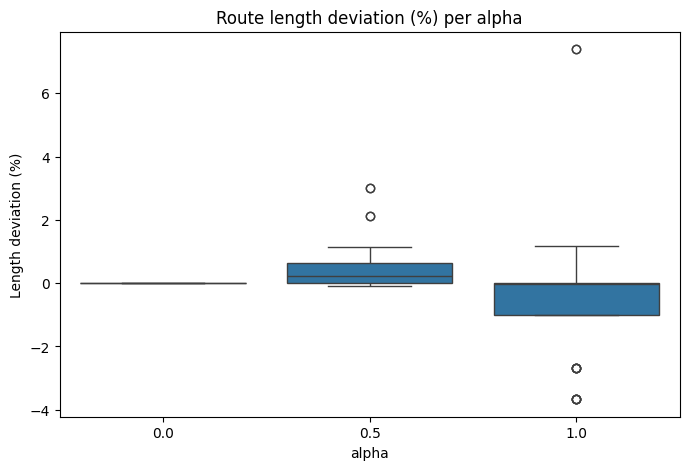

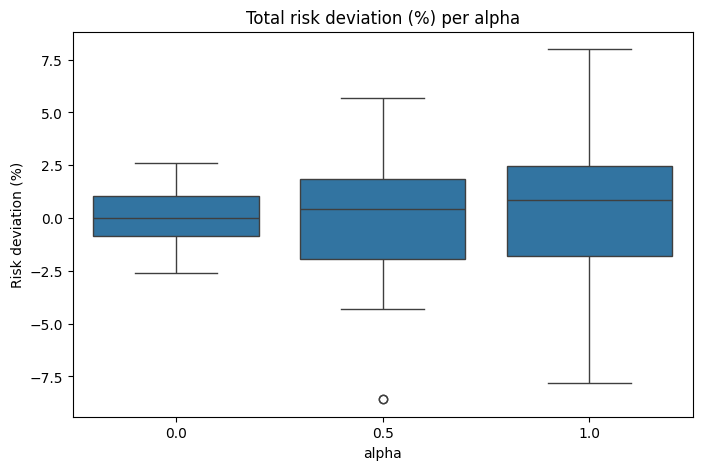

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_sensitivity, x="alpha", y="length_dev")
plt.title("Route length deviation (%) per alpha")
plt.ylabel("Length deviation (%)")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_sensitivity, x="alpha", y="risk_dev")
plt.title("Total risk deviation (%) per alpha")
plt.ylabel("Risk deviation (%)")
plt.show()


## SA 3: Beleidsmatige Wegingen: Fatality, Property, Societal Impact

In [ ]:
policy_weights = [
    ("Base",        (0.4, 0.3, 0.3)),
    ("Equal",       (1/3, 1/3, 1/3)),
    ("Fatality",    (0.6, 0.2, 0.2)),
    ("Property",    (0.2, 0.6, 0.2)),
    ("Societal",    (0.2, 0.2, 0.6))
]

# dit is beleidsanalyse, gevoeligheids analyse moet +/- 10%

In [155]:
# Aantal externe risicofactoren
n_factors = 5

# Bereken cumulatieve bijdrage per domein (zonder deling)
R_f_total = 0
R_p_total = 0

# Loop over externe risicofactoren
for i in range(1, n_factors + 1):
    # Bereken afzonderlijke fatality- en property-risicobijdragen
    df[f"R_if_{i}"] = df["Sf"] * df[f"L{i}"]
    df[f"R_ip_{i}"] = df["Sp"] * df[f"L{i}"]
    
    # Tel cumulatief op
    R_f_total += df[f"R_if_{i}"]
    R_p_total += df[f"R_ip_{i}"]

# Cumulatieve crash-gerelateerde risico's
df["R_f"] = R_f_total
df["R_p"] = R_p_total

# Sociaal risico (losstaand van risicofactoren)
df["R_s"] = df["Ss"]

# Normaliseer fatality, property en societal domeinen afzonderlijk
df["R_f_norm"] = (df["R_f"] - df["R_f"].min()) / (df["R_f"].max() - df["R_f"].min())
df["R_p_norm"] = (df["R_p"] - df["R_p"].min()) / (df["R_p"].max() - df["R_p"].min())
df["R_s_norm"] = (df["R_s"] - df["R_s"].min()) / (df["R_s"].max() - df["R_s"].min())


In [156]:
for name, (α_f, α_p, α_s) in policy_weights:
    df[f"risk_{name}"] = α_f * df["R_f_norm"] + α_p * df["R_p_norm"] + α_s * df["R_s_norm"]



In [157]:
df

,area_type,Sf,Sp,Ss,L1,L2,L3,L4,L5,Height,...,R_p,R_s,R_f_norm,R_p_norm,R_s_norm,risk_Base,risk_Equal,risk_Fatality,risk_Property,risk_Societal
0,Motorways and major roads,2.0,3.0,1.0,3.0,2.0,1.0,1.0,3.0,30.0,...,30.0,1.0,0.225806,0.307692,0.000000,0.182630,0.177833,0.197022,0.229777,0.106700
1,Regional roads,3.0,3.0,2.0,4.0,3.0,1.0,3.0,2.0,30.0,...,39.0,2.0,0.532258,0.423077,0.333333,0.439826,0.429556,0.470637,0.426964,0.391067
2,Tracks and rural access roads,2.0,2.0,1.0,2.0,1.0,3.0,2.0,2.0,30.0,...,20.0,1.0,0.225806,0.179487,0.000000,0.144169,0.135098,0.171381,0.152854,0.081059
3,Living and residential streets,3.0,4.0,4.0,5.0,4.0,1.0,5.0,3.0,30.0,...,72.0,4.0,0.774194,0.846154,1.000000,0.863524,0.873449,0.833747,0.862531,0.924069
4,Pedestrian and cycling paths,3.0,2.0,3.0,4.0,2.0,2.0,2.0,2.0,30.0,...,24.0,3.0,0.483871,0.230769,0.666667,0.462779,0.460436,0.469810,0.368569,0.542928
5,Railways,1.0,3.0,2.0,5.0,2.0,2.0,1.0,4.0,30.0,...,42.0,2.0,0.129032,0.461538,0.333333,0.290074,0.307968,0.236394,0.369396,0.318114
6,Bridges,3.0,2.0,2.0,4.0,2.0,1.0,1.0,3.0,30.0,...,22.0,2.0,0.435484,0.205128,0.333333,0.335732,0.324648,0.368983,0.276840,0.328122
7,Power lines,1.0,4.0,1.0,2.0,2.0,3.0,1.0,5.0,60.0,...,52.0,1.0,0.112903,0.589744,0.000000,0.222084,0.234216,0.185691,0.376427,0.140529
8,Power plants,1.0,4.0,2.0,4.0,3.0,2.0,3.0,5.0,60.0,...,68.0,2.0,0.177419,0.794872,0.333333,0.409429,0.435208,0.332093,0.579074,0.394458
9,Communication towers,1.0,3.0,1.0,4.0,5.0,1.0,2.0,4.0,60.0,...,48.0,1.0,0.161290,0.538462,0.000000,0.226055,0.233251,0.204467,0.355335,0.139950


In [158]:
import matplotlib.pyplot as plt

def plot_policy_etypes_stacked_barplot(df_etypes, top_n=None, figsize=(12, 6)):
    """
    Plot a stacked barplot of edge type usage per policy using a fixed color map.

    Args:
        df_etypes (pd.DataFrame): DataFrame with index=edge types, columns=policy names, values=counts.
        area_color_map (dict): Dictionary mapping edge types to HEX color codes.
        top_n (int, optional): If set, only the top N most-used etypes will be plotted.
        figsize (tuple): Size of the resulting plot.
    """
    # Copy and fill missing colors
    color_map = {
        # Infrastructuur
        'Motorways and major roads': '#E31A1C',       # felrood – druk verkeer
        'Regional roads': '#FC4E2A',                  # oranje – secundair verkeer
        'Tracks and rural access roads': '#FD8D3C',   # lichtoranje – landelijk
        'Living and residential streets': '#FEB24C',  # amber – wonen
        'Pedestrian and cycling paths': '#33A02C',    # felgroen – toegankelijk
        'Railways': '#6A3D9A',                        # paars – spoor
        'Bridges': '#1F78B4',                         # staalblauw – verbinding
        'Helipads': '#F0027F',                        # magenta – luchtverkeer
        'Airports and airfields': '#A6CEE3',          # lichtblauw – grote infrastructuur

        # Energie & communicatie
        'Power lines': '#B15928',                     # bruin – energie
        'Power plants': '#FF7F00',                    # oranje – risico
        'Wind turbines': '#CAB2D6',                   # lila – duurzaam
        'Communication towers': '#FB9A99',            # roze – zenders
        'High infrastructures': '#A6761D',            # donkerbruin – hoog

        # Gebouwd gebied
        'Industrial zones': '#377EB8',                # blauw – industrie
        'Commercial zones': '#984EA3',                # paars – commercieel
        'Retail zones': '#FFB300',                    # goudgeel – winkels
        'Residential areas': '#FFFF33',               # felgeel – wonen
        'Schools and universities': '#FDBF6F',        # lichtoranje – educatie
        'Hospitals': '#E41A1C',                       # felrood – urgentie
        'Care homes': '#FB8072',                      # zachtrood – zorg
        'Prisons': '#636363',                         # grijs – beperkt
        'Religious sites': '#FF69B4',                 # roze – symbolisch
        'Cemeteries': '#8B0000',                      # donkerrood – herdenking
        'Cultural sites': '#6A3D9A',                  # diep paars – cultuur

        # Openbare ruimte en natuur
        'Parks': '#4DAF4A',                           # helder groen – ontspanning
        'Recreational zones': '#66C2A5',              # turquoise – recreatie
        'Meadows and open grass': '#B2DF8A',          # lichtgroen – open
        'Forests and woodlands': '#1B9E77',           # donkergroen – bos
        'Agricultural lands': '#FFFFB3',              # lichtgeel – landelijk
        'Wetlands': '#A6CEE3',                        # lichtblauw – nat
        'Lakes and ponds': '#1F78B4',                 # blauw – water
        'Water reservoirs': '#00BFFF',                # helderblauw – wateropslag
        'Rivers, canals and streams': '#6BAED6',      # rivierblauw – stromend water
        'Natura2000 areas': '#005824',                # donkergroen – beschermd

        # Overig
        'connector': '#D3D3D3',                       # lichtgrijs – tussenstuk
        'No-fly zone': '#B22222'                      # vuurrood – verboden
    }



    for etype in df_etypes.index:
        if etype not in color_map:
            color_map[etype] = "#D3D3D3"  # fallback color for unknown types

    # Sort by total usage
    df_sorted = df_etypes.loc[df_etypes.sum(axis=1).sort_values(ascending=False).index]

    # Limit to top N etypes if specified
    if top_n is not None:
        df_sorted = df_sorted.head(top_n)

    # Map etypes to colors
    colors = [color_map.get(etype, "#D3D3D3") for etype in df_sorted.index]

    # Plot
    ax = df_sorted.T.plot(kind="bar", stacked=True, figsize=figsize, width=0.75, color=colors)

    ax.set_title("Edge Type Usage per Policy")
    ax.set_xlabel("Policy")
    ax.set_ylabel("Number of edges used in paths")
    ax.legend(title="Edge Type", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize='small')

    plt.tight_layout()
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.show()


## Breda

In [161]:
policy_weights = [
    ("Base",        "risk_Base"),
    ("Equal",       "risk_Equal"),
    ("Fatality",    "risk_Fatality"),
    ("Property",    "risk_Property"),
    ("Societal",    "risk_Societal")
]

In [162]:
policy_results = {}

for policy_name, risk_col in policy_weights:
    # Update edge risks per etype volgens de juiste kolom
    etype_to_risk = dict(zip(df["area_type"], df[risk_col]))
    for u, v, data in G.edges(data=True):
        etype = data.get("etype")
        if etype in etype_to_risk:
            data["risk"] = etype_to_risk[etype]
        if etype == "postnl_connector":
            data["risk"] = 0.0

    # Run path planning
    connected, not_connected = connect_distribution_to_postnl(G, alpha=1, method="dijkstra")
    policy_results[policy_name] = connected

Distribution points: 1
PostNL points: 64
Alpha: 1, Method: dijkstra
Connected: 157648 → 0 | 3911.6 m | 185 nodes
Connected: 157648 → 1 | 6251.1 m | 241 nodes
Connected: 157648 → 2 | 9200.0 m | 372 nodes
Connected: 157648 → 3 | 6678.6 m | 281 nodes
Connected: 157648 → 4 | 10301.7 m | 385 nodes
Connected: 157648 → 5 | 5503.1 m | 215 nodes
Connected: 157648 → 6 | 4952.0 m | 203 nodes
Connected: 157648 → 7 | 5590.1 m | 261 nodes
Connected: 157648 → 8 | 3040.9 m | 97 nodes
No path: 9
Connected: 157648 → 10 | 5672.4 m | 274 nodes
Connected: 157648 → 11 | 8847.6 m | 405 nodes
Connected: 157648 → 12 | 4446.4 m | 166 nodes
Connected: 157648 → 13 | 6582.7 m | 286 nodes
Connected: 157648 → 14 | 9003.4 m | 400 nodes
Connected: 157648 → 15 | 10759.5 m | 550 nodes
Connected: 157648 → 16 | 7031.5 m | 297 nodes
Connected: 157648 → 17 | 3810.7 m | 173 nodes
Connected: 157648 → 18 | 3414.4 m | 121 nodes
Connected: 157648 → 19 | 3381.0 m | 124 nodes
Connected: 157648 → 20 | 6274.6 m | 263 nodes
Connected

In [163]:
import pandas as pd

summary_stats = []

for policy, results in policy_results.items():
    lengths = [r[2] for r in results]  # r[2] is de totale lengte
    summary_stats.append({
        "Policy": policy,
        "n_paths": len(lengths),
        "avg_length": np.mean(lengths),
        "min_length": np.min(lengths),
        "max_length": np.max(lengths)
    })

df_summary = pd.DataFrame(summary_stats).sort_values("avg_length")
print(df_summary)


     Policy  n_paths   avg_length  min_length    max_length
2  Fatality       63  6102.204504   911.01043  17607.874723
0      Base       63  6126.757770   911.01043  17607.874723
3  Property       63  6140.015937   911.01043  17607.874723
1     Equal       63  6144.836705   911.01043  17607.874723
4  Societal       63  6324.406189   880.61936  18271.384182
